In [1]:
import re
import pandas as pd

In [2]:
f = open('chat.txt','r',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(data)

[25/06/24, 8:50:10 PM] Rakshita Suresh: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[25/06/24, 8:50:10 PM] Sha: Hi
[25/06/24, 8:53:46 PM] Rakshita Suresh: Hii pradeep
[26/06/24, 9:11:37 AM] Sha: Yenga irruka
[26/06/24, 9:14:43 AM] Rakshita Suresh: class
[26/06/24, 9:15:47 AM] Sha: Started ?
[26/06/24, 9:15:57 AM] Rakshita Suresh: No
[01/07/24, 9:17:11 AM] Sha: ‎Voice call, ‎No answer
[01/07/24, 10:18:48 AM] Rakshita Suresh: Sollu Pradeep
[01/07/24, 8:05:24 PM] Sha: Actually I wanted to ask you abt jayram do u kno him
[01/07/24, 9:51:34 PM] Rakshita Suresh: Which jayram?
[01/07/24, 10:08:46 PM] Sha: The one who wear 🤓
[01/07/24, 10:24:05 PM] Rakshita Suresh: Idk
[01/07/24, 10:24:24 PM] Rakshita Suresh: Y kekura?
[01/07/24, 10:37:12 PM] Sha: Ava kita sir oda pendrive irruku Avan no teriyathu so
[02/07/24, 9:59:29 AM] Rakshita Suresh: Oh okok
[02/07/24, 7:05:16 PM] Sha: Hey rishita told me how’s your health
[02/

In [5]:
type(data)

str

In [6]:
pattern = '\[\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}:\d{2}\s[APM]{2}\]'

In [7]:
messages = re.split(pattern,data)[1:]

In [8]:
messages

[' Rakshita Suresh: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n',
 ' Sha: Hi\n',
 ' Rakshita Suresh: Hii pradeep\n',
 ' Sha: Yenga irruka\n',
 ' Rakshita Suresh: class\n',
 ' Sha: Started ?\n',
 ' Rakshita Suresh: No\n',
 ' Sha: \u200eVoice call, \u200eNo answer\n',
 ' Rakshita Suresh: Sollu Pradeep\n',
 ' Sha: Actually I wanted to ask you abt jayram do u kno him\n',
 ' Rakshita Suresh: Which jayram?\n',
 ' Sha: The one who wear 🤓\n',
 ' Rakshita Suresh: Idk\n',
 ' Rakshita Suresh: Y kekura?\n',
 ' Sha: Ava kita sir oda pendrive irruku Avan no teriyathu so\n',
 ' Rakshita Suresh: Oh okok\n',
 ' Sha: Hey rishita told me how’s your health\n',
 ' Rakshita Suresh: Better pradeep\n',
 ' Sha: Take care of yourself and stay strong ✨\n',
 ' Rakshita Suresh: Ha🙂\n',
 ' Rakshita Suresh: Pradeep\n',
 ' Rakshita Suresh: Hackathon edachum reg panni irukiya?\n',
 ' Sha: Ilaya\n',
 ' Sha: Yethavthu irruntha sollu\n',

In [9]:
dates = re.findall(pattern, data)

In [10]:
dates = [date.replace('\u202f', ' ').strip('[]') for date in dates]

In [11]:
dates

['25/06/24, 8:50:10 PM',
 '25/06/24, 8:50:10 PM',
 '25/06/24, 8:53:46 PM',
 '26/06/24, 9:11:37 AM',
 '26/06/24, 9:14:43 AM',
 '26/06/24, 9:15:47 AM',
 '26/06/24, 9:15:57 AM',
 '01/07/24, 9:17:11 AM',
 '01/07/24, 10:18:48 AM',
 '01/07/24, 8:05:24 PM',
 '01/07/24, 9:51:34 PM',
 '01/07/24, 10:08:46 PM',
 '01/07/24, 10:24:05 PM',
 '01/07/24, 10:24:24 PM',
 '01/07/24, 10:37:12 PM',
 '02/07/24, 9:59:29 AM',
 '02/07/24, 7:05:16 PM',
 '02/07/24, 9:14:02 PM',
 '02/07/24, 9:48:57 PM',
 '03/07/24, 12:47:29 PM',
 '04/07/24, 8:07:17 PM',
 '04/07/24, 8:07:25 PM',
 '04/07/24, 10:56:05 PM',
 '04/07/24, 10:56:20 PM',
 '04/07/24, 11:54:46 PM',
 '05/07/24, 10:13:10 AM',
 '05/07/24, 10:13:29 AM',
 '05/07/24, 12:15:16 PM',
 '05/07/24, 12:16:00 PM',
 '05/07/24, 12:16:09 PM',
 '05/07/24, 12:17:07 PM',
 '05/07/24, 12:17:19 PM',
 '05/07/24, 12:17:23 PM',
 '05/07/24, 12:17:40 PM',
 '05/07/24, 12:17:49 PM',
 '05/07/24, 12:18:54 PM',
 '05/07/24, 12:19:09 PM',
 '05/07/24, 12:20:00 PM',
 '05/07/24, 12:20:25 PM',
 '

In [12]:

dates = [date.replace('\u202f', ' ').strip('[]') for date in dates]

# Create DataFrame
df = pd.DataFrame({'user_message':messages,'message_date': dates})

# Convert the 'message_date' column to datetime format
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %I:%M:%S %p')

# Rename the 'message_date' column to 'date'
df.rename(columns={'message_date': 'date'}, inplace=True)

# Format the 'date' column to display in AM/PM format
df['date'] = df['date'].dt.strftime('%d/%m/%y %I:%M:%S %p')

# Display the DataFrame
print(df)

                                          user_message                  date
0     Rakshita Suresh: ‎Messages and calls are end-...  25/06/24 08:50:10 PM
1                                            Sha: Hi\n  25/06/24 08:50:10 PM
2                       Rakshita Suresh: Hii pradeep\n  25/06/24 08:53:46 PM
3                                  Sha: Yenga irruka\n  26/06/24 09:11:37 AM
4                             Rakshita Suresh: class\n  26/06/24 09:14:43 AM
..                                                 ...                   ...
765                               Sha: Yenaku irruku\n  16/08/24 08:50:33 PM
766                    Sha: Ipo dan Chennai ye varan\n  16/08/24 08:50:52 PM
767                              Rakshita Suresh: Oh\n  16/08/24 08:50:57 PM
768   Sha: Have you  reached ‎<This message was edi...  17/08/24 06:02:01 PM
769                             Rakshita Suresh: Yes\n  17/08/24 06:33:33 PM

[770 rows x 2 columns]


In [13]:
df.head()

,user_message,date
0,Rakshita Suresh: ‎Messages and calls are end-...,25/06/24 08:50:10 PM
1,Sha: Hi\n,25/06/24 08:50:10 PM
2,Rakshita Suresh: Hii pradeep\n,25/06/24 08:53:46 PM
3,Sha: Yenga irruka\n,26/06/24 09:11:37 AM
4,Rakshita Suresh: class\n,26/06/24 09:14:43 AM


In [14]:
#seperate users and messages
users = []
messages=[]
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]: #username
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'],inplace=True)


In [15]:
df.head()

,date,user,message
0,25/06/24 08:50:10 PM,Rakshita Suresh,‎Messages and calls are end-to-end encrypted. ...
1,25/06/24 08:50:10 PM,Sha,Hi\n
2,25/06/24 08:53:46 PM,Rakshita Suresh,Hii pradeep\n
3,26/06/24 09:11:37 AM,Sha,Yenga irruka\n
4,26/06/24 09:14:43 AM,Rakshita Suresh,class\n


In [16]:
# Convert the 'date' column to datetime format
df['datetime'] = pd.to_datetime(df['date'], format='%d/%m/%y %I:%M:%S %p')

# Create new columns for year, month, day, and hour
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

# Drop the 'datetime' column if you don't need it anymore
df.drop(columns=['datetime'], inplace=True)
# Drop the row at index 0
df.drop(index=0, inplace=True)

# Reset the index to keep it continuous
df.reset_index(drop=True, inplace=True)








In [17]:
import calendar

# Convert the 'month' column from numbers to month names
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

In [18]:
df.head(55)

,date,user,message,year,month,day,hour
0,25/06/24 08:50:10 PM,Sha,Hi\n,2024,June,25,20
1,25/06/24 08:53:46 PM,Rakshita Suresh,Hii pradeep\n,2024,June,25,20
2,26/06/24 09:11:37 AM,Sha,Yenga irruka\n,2024,June,26,9
3,26/06/24 09:14:43 AM,Rakshita Suresh,class\n,2024,June,26,9
4,26/06/24 09:15:47 AM,Sha,Started ?\n,2024,June,26,9
5,26/06/24 09:15:57 AM,Rakshita Suresh,No\n,2024,June,26,9
6,01/07/24 09:17:11 AM,Sha,"‎Voice call, ‎No answer\n",2024,July,1,9
7,01/07/24 10:18:48 AM,Rakshita Suresh,Sollu Pradeep\n,2024,July,1,10
8,01/07/24 08:05:24 PM,Sha,Actually I wanted to ask you abt jayram do u k...,2024,July,1,20
9,01/07/24 09:51:34 PM,Rakshita Suresh,Which jayram?\n,2024,July,1,21


In [19]:
words = []
for message in df['message']:
    words.extend(message.split())

In [20]:
len(words)

2912

In [21]:
df[df['message'] == '‎image omitted\n']

,date,user,message,year,month,day,hour
53,05/07/24 08:10:34 PM,Sha,‎image omitted\n,2024,July,5,20
93,08/07/24 07:05:04 PM,Rakshita Suresh,‎image omitted\n,2024,July,8,19
118,08/07/24 07:51:44 PM,Rakshita Suresh,‎image omitted\n,2024,July,8,19
126,08/07/24 07:53:37 PM,Rakshita Suresh,‎image omitted\n,2024,July,8,19
130,08/07/24 07:58:27 PM,Rakshita Suresh,‎image omitted\n,2024,July,8,19
145,08/07/24 08:11:07 PM,Rakshita Suresh,‎image omitted\n,2024,July,8,20
174,10/07/24 03:41:48 PM,Sha,‎image omitted\n,2024,July,10,15
194,10/07/24 11:39:02 PM,Rakshita Suresh,‎image omitted\n,2024,July,10,23
251,20/07/24 09:11:29 AM,Sha,‎image omitted\n,2024,July,20,9
311,31/07/24 04:51:28 PM,Rakshita Suresh,‎image omitted\n,2024,July,31,16


In [22]:
df[df['message'] == '‎sticker omitted\n']

,date,user,message,year,month,day,hour
73,08/07/24 03:40:22 PM,Rakshita Suresh,‎sticker omitted\n,2024,July,8,15
232,20/07/24 09:02:00 AM,Rakshita Suresh,‎sticker omitted\n,2024,July,20,9
413,03/08/24 11:42:04 AM,Rakshita Suresh,‎sticker omitted\n,2024,August,3,11
439,03/08/24 02:28:59 PM,Rakshita Suresh,‎sticker omitted\n,2024,August,3,14
450,04/08/24 01:06:58 PM,Rakshita Suresh,‎sticker omitted\n,2024,August,4,13
485,05/08/24 08:12:17 AM,Rakshita Suresh,‎sticker omitted\n,2024,August,5,8
538,11/08/24 01:49:48 PM,Rakshita Suresh,‎sticker omitted\n,2024,August,11,13
557,11/08/24 01:53:52 PM,Rakshita Suresh,‎sticker omitted\n,2024,August,11,13
563,11/08/24 01:54:45 PM,Rakshita Suresh,‎sticker omitted\n,2024,August,11,13
641,12/08/24 04:49:16 PM,Rakshita Suresh,‎sticker omitted\n,2024,August,12,16


In [23]:
df[df['message'] == '‎sticker omitted\n']

,date,user,message,year,month,day,hour
73,08/07/24 03:40:22 PM,Rakshita Suresh,‎sticker omitted\n,2024,July,8,15
232,20/07/24 09:02:00 AM,Rakshita Suresh,‎sticker omitted\n,2024,July,20,9
413,03/08/24 11:42:04 AM,Rakshita Suresh,‎sticker omitted\n,2024,August,3,11
439,03/08/24 02:28:59 PM,Rakshita Suresh,‎sticker omitted\n,2024,August,3,14
450,04/08/24 01:06:58 PM,Rakshita Suresh,‎sticker omitted\n,2024,August,4,13
485,05/08/24 08:12:17 AM,Rakshita Suresh,‎sticker omitted\n,2024,August,5,8
538,11/08/24 01:49:48 PM,Rakshita Suresh,‎sticker omitted\n,2024,August,11,13
557,11/08/24 01:53:52 PM,Rakshita Suresh,‎sticker omitted\n,2024,August,11,13
563,11/08/24 01:54:45 PM,Rakshita Suresh,‎sticker omitted\n,2024,August,11,13
641,12/08/24 04:49:16 PM,Rakshita Suresh,‎sticker omitted\n,2024,August,12,16


In [24]:
a = df.iloc[65]['message']


In [25]:
a

'AMCAT Modules and Syllabus - General.pdf • \u200e19 pages \u200edocument omitted\n'

In [26]:
df[df['message'] == '‎image omitted\n'].shape[0]

18

In [27]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [28]:
from urlextract import URLExtract
extractor = URLExtract()
urls = extractor.find_urls("lets www.gmail.com have URL satck.com as google.com, https://facebook.com")


In [29]:
urls

['www.gmail.com', 'satck.com', 'google.com', 'https://facebook.com']

In [30]:
links=[]
for message in df['message']:
     links.extend(extractor.find_urls(message))
    

In [31]:
links

['https://docs.google.com/document/d/1t2F7CwTrUQr5QFhqBdS_lQc5Yg9LU7W4Wu4rHPYpxRA/edit',
 'https://www.youtube.com/live/bOD5b1GV1Z8?si=4bCEhZ48HOp4mBrb',
 'https://neetcode.io/roadmap',
 'a.CL',
 'a.ML',
 'a.CL',
 'a.ML',
 'https://takeuforward.org/interviews/strivers-sde-sheet-top-coding-interview-problems/',
 'https://leetcode.com/discuss/interview-question/2032859/juspay-oa-maximum-weight-node',
 'https://leetcode.com/discuss/interview-question/2032910/Juspay-or-OA-or-Nearest-Meeting-Cell',
 'https://leetcode.com/discuss/interview-question/1186405/largest-sum-cycle']

In [32]:
len(links)

11

In [33]:
df

,date,user,message,year,month,day,hour
0,25/06/24 08:50:10 PM,Sha,Hi\n,2024,June,25,20
1,25/06/24 08:53:46 PM,Rakshita Suresh,Hii pradeep\n,2024,June,25,20
2,26/06/24 09:11:37 AM,Sha,Yenga irruka\n,2024,June,26,9
3,26/06/24 09:14:43 AM,Rakshita Suresh,class\n,2024,June,26,9
4,26/06/24 09:15:47 AM,Sha,Started ?\n,2024,June,26,9
...,...,...,...,...,...,...,...
764,16/08/24 08:50:33 PM,Sha,Yenaku irruku\n,2024,August,16,20
765,16/08/24 08:50:52 PM,Sha,Ipo dan Chennai ye varan\n,2024,August,16,20
766,16/08/24 08:50:57 PM,Rakshita Suresh,Oh\n,2024,August,16,20
767,17/08/24 06:02:01 PM,Sha,Have you reached ‎<This message was edited>\n,2024,August,17,18


In [34]:
df['user'].value_counts().head()

user
 Rakshita Suresh    432
 Sha                337
Name: count, dtype: int64

In [35]:
import matplotlib.pyplot as plt

In [36]:
x = df['user'].value_counts().head()

In [37]:
name = x.index
count = x.values

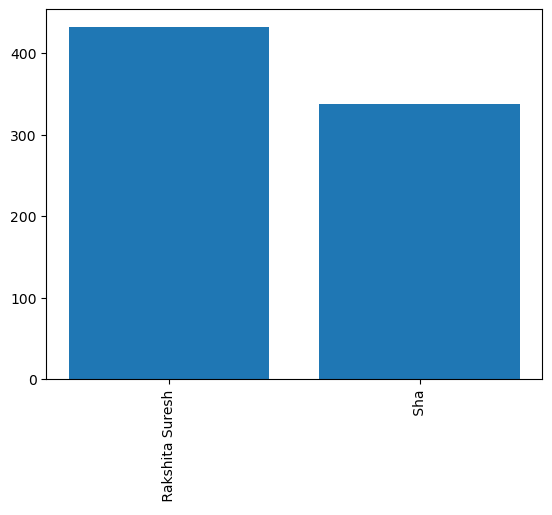

In [38]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [39]:
round((df['user'].value_counts()/df.shape[0])*100,2)

user
 Rakshita Suresh    56.18
 Sha                43.82
Name: count, dtype: float64

In [40]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index()

,user,count
0,Rakshita Suresh,56.18
1,Sha,43.82


In [41]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'user':'name','count':'percent'})

,name,percent
0,Rakshita Suresh,56.18
1,Sha,43.82


In [42]:
df['message']

0                                                Hi\n
1                                       Hii pradeep\n
2                                      Yenga irruka\n
3                                             class\n
4                                         Started ?\n
                            ...                      
764                                   Yenaku irruku\n
765                        Ipo dan Chennai ye varan\n
766                                              Oh\n
767    Have you  reached ‎<This message was edited>\n
768                                             Yes\n
Name: message, Length: 769, dtype: object

In [43]:
from collections import Counter

In [44]:
#remove group notifications
#remove media omitted
#remove stop words


In [45]:
filtered_df = df[~df['message'].str.contains('audio omitted\n|video omitted\n|sticker omitted\n|document omitted\n$|omitted\n$')]

In [46]:
f = open('stopwords-T-H-E.txt','r')
stop_words = f.read()

In [47]:
print(stop_words)

.
..
...
?
-
--
+
=
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could


In [48]:
words = []
for msg in filtered_df['message']:
    for word in msg.lower().split():
        if word not in stop_words:
            words.append(word)

In [49]:
words

['hii',
 'pradeep',
 'irruka',
 'class',
 'started',
 '\u200evoice',
 'call,',
 '\u200eno',
 'answer',
 'pradeep',
 'wanted',
 'abt',
 'jayram',
 'jayram?',
 'wear',
 '🤓',
 'kekura?',
 'kita',
 'pendrive',
 'irruku',
 'teriyathu',
 'okok',
 'rishita',
 'told',
 'how’s',
 'health',
 'pradeep',
 'care',
 'stay',
 'strong',
 '✨',
 'ha🙂',
 'pradeep',
 'hackathon',
 'edachum',
 'irukiya?',
 'ilaya',
 'yethavthu',
 'irruntha',
 'pradeep…',
 'namba',
 'cbcs',
 'buss',
 'anal',
 'assignment',
 'mudikanum',
 'vanthu',
 'yethavthu',
 'peripherals',
 'pani',
 'mini',
 'project',
 'choose',
 'pana',
 'sonaru',
 'ohh',
 'apdiyaaa',
 'mini',
 'project',
 'grp',
 'ilaya??',
 'grp',
 'nee?',
 'yethavthu',
 'choose',
 'vechu',
 'choose',
 'pandradhune',
 'therla',
 'pannanumnu',
 'theriyala',
 'pathutu',
 'solran',
 'vanthu',
 'individual',
 'avru',
 'placement',
 'evaluate',
 'pandran',
 'sonaru',
 'ohh',
 'apdiyaaaaa',
 '😳',
 'kadavuleyyy',
 'pradeep',
 'tharanum',
 'enkaku',
 'chill',
 'i’ll',
 'fig

In [50]:
Counter(words).most_common(20)

[('\u200e', 41),
 ('pradeep', 24),
 ('ipo', 14),
 (':)', 12),
 ('😂', 10),
 ('i’ll', 9),
 ('lot', 8),
 ('it’s', 8),
 ('project', 7),
 ('send', 7),
 ('test', 7),
 ('irruku', 6),
 ('group', 6),
 ('omitted', 6),
 ('\u200e<this', 6),
 ('message', 6),
 ('edited>', 6),
 ('iam', 6),
 ('today', 6),
 ('review', 6)]

In [51]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,‎,41
1,pradeep,24
2,ipo,14
3,:),12
4,😂,10
5,i’ll,9
6,lot,8
7,it’s,8
8,project,7
9,send,7


In [52]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [53]:
import emoji

In [54]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
 

In [55]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,16
1,🫂,6
2,😶,6
3,🥲,4
4,💀,3
5,🙃,3
6,🔥,3
7,😉,3
8,✨,2
9,😳,2


In [56]:
df.head(5)

,date,user,message,year,month,day,hour
0,25/06/24 08:50:10 PM,Sha,Hi\n,2024,June,25,20
1,25/06/24 08:53:46 PM,Rakshita Suresh,Hii pradeep\n,2024,June,25,20
2,26/06/24 09:11:37 AM,Sha,Yenga irruka\n,2024,June,26,9
3,26/06/24 09:14:43 AM,Rakshita Suresh,class\n,2024,June,26,9
4,26/06/24 09:15:47 AM,Sha,Started ?\n,2024,June,26,9


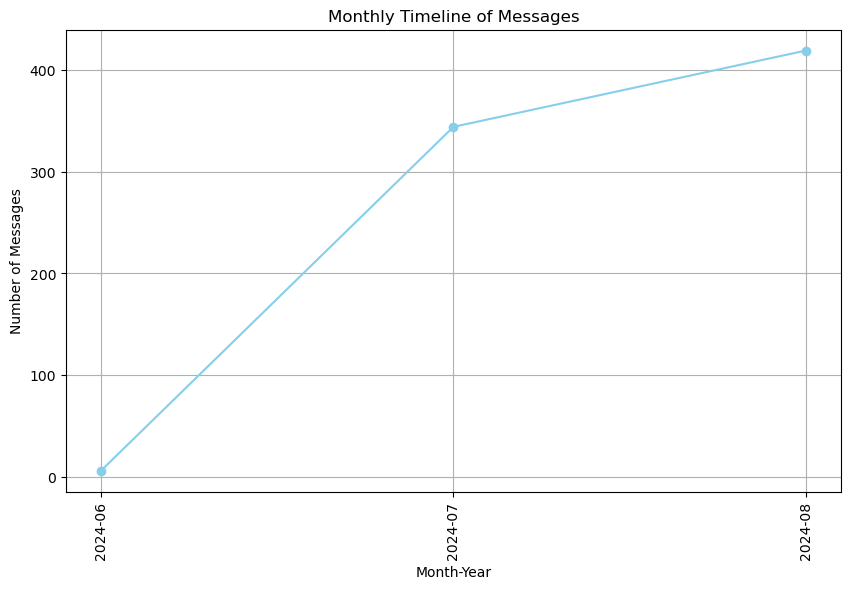

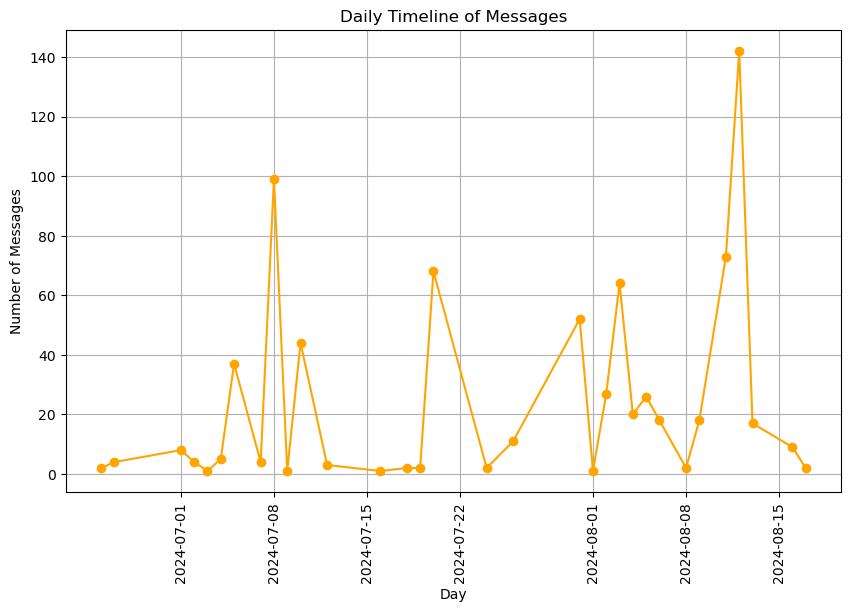

In [57]:
# Convert 'date' to datetime format if not already done
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y %I:%M:%S %p')

# Create 'month_year' and 'day' columns for analysis
df['month_year'] = df['date'].dt.to_period('M')
df['day'] = df['date'].dt.date

# Group by month_year to analyze monthly trends
monthly_timeline = df.groupby('month_year').count()['message'].reset_index()

# Group by day to analyze daily trends
daily_timeline = df.groupby('day').count()['message'].reset_index()

# Plotting the Monthly Timeline
plt.figure(figsize=(10, 6))
plt.plot(monthly_timeline['month_year'].astype(str), monthly_timeline['message'], marker='o', color='skyblue')
plt.xticks(rotation=90)
plt.title('Monthly Timeline of Messages')
plt.xlabel('Month-Year')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.show()

# Plotting the Daily Timeline
plt.figure(figsize=(10, 6))
plt.plot(daily_timeline['day'], daily_timeline['message'], marker='o', color='orange')
plt.xticks(rotation=90)
plt.title('Daily Timeline of Messages')
plt.xlabel('Day')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.show()

In [58]:
df.head(5)

,date,user,message,year,month,day,hour,month_year
0,2024-06-25 20:50:10,Sha,Hi\n,2024,June,2024-06-25,20,2024-06
1,2024-06-25 20:53:46,Rakshita Suresh,Hii pradeep\n,2024,June,2024-06-25,20,2024-06
2,2024-06-26 09:11:37,Sha,Yenga irruka\n,2024,June,2024-06-26,9,2024-06
3,2024-06-26 09:14:43,Rakshita Suresh,class\n,2024,June,2024-06-26,9,2024-06
4,2024-06-26 09:15:47,Sha,Started ?\n,2024,June,2024-06-26,9,2024-06
